# Name : Tharindu O.K.D
# Index No. : 190622R

Question 01

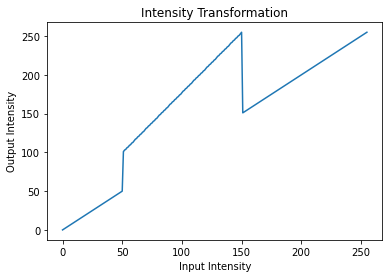

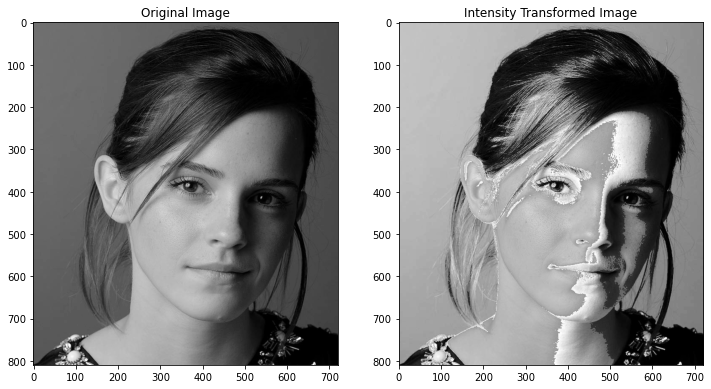

In [58]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

array_1 = np.array([ i for i in range(0,51)])
array_2 = np.array([ (155 / 100) * (i - 50) + 100 for i in range(51,151)])
array_3 = np.array([i for i in range(151,256)])
transform = np.concatenate((array_1, array_2, array_3),axis=0).astype(np.uint8)

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")

im = cv.imread(r"emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert im is not None

transformed_image = cv.LUT(im, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Intensity Transformed Image")
plt.show()


Question 02

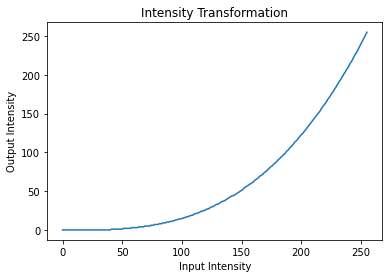

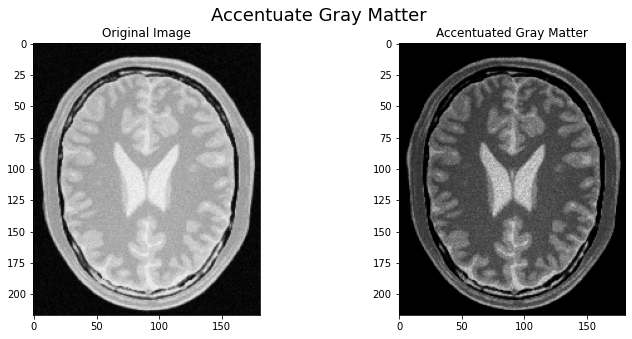

In [57]:
im = cv.imread(r"brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert im is not None

# accentuate white matter
white_transform = np.array([((i / 255) ** 3) * 255 for i in range(0,256)],dtype=np.uint8)
white_transformed_image = cv.LUT(im, white_transform)

fig, ax = plt.subplots()
ax.plot(white_transform)
ax.set_title("Intensity Transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Accentuate Gray Matter", fontsize=18)
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(white_transformed_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Accentuated Gray Matter")
plt.show()

Text(0.5, 1.0, 'Accentuated Gray Matter')

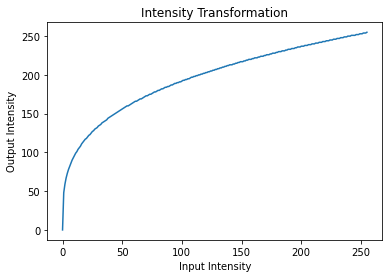

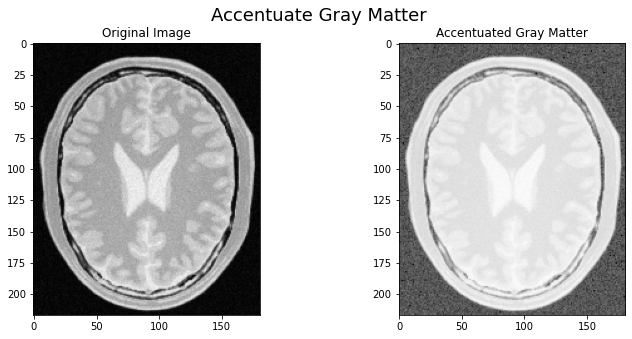

In [56]:
gray_transform = np.array([((i / 255) ** 0.3) * 255 for i in range(0,256)],dtype=np.uint8)
gray_transformed_image = cv.LUT(im, gray_transform)

fig, ax = plt.subplots()
ax.plot(gray_transform)
ax.set_title("Intensity Transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Accentuate Gray Matter", fontsize=18)
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(gray_transformed_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Accentuated Gray Matter")
plt.show()

Question 03

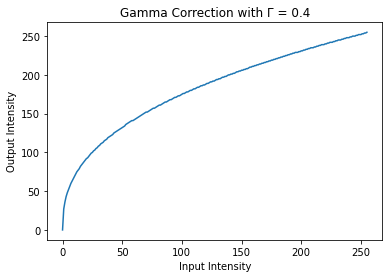

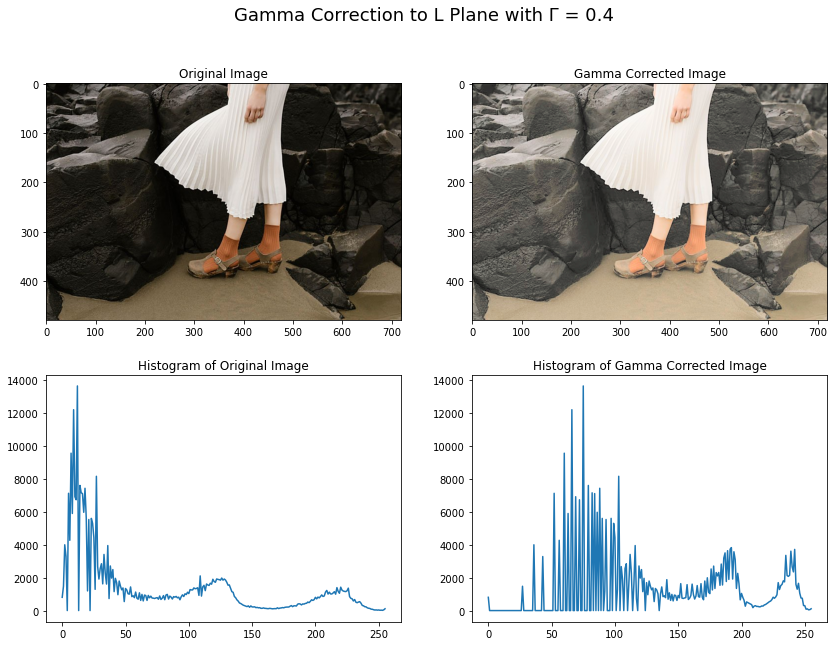

In [72]:
im = cv.imread(r"highlights_and_shadows.jpg")
assert im is not None

LAB_image = cv.cvtColor(im, cv.COLOR_BGR2LAB)
original_hist = cv.calcHist([LAB_image], [0], None, [256], [0, 256])
gamma = 0.4
gamma_correction = np.array([((i / 255) ** gamma) * 255 for i in range(0,256)],dtype=np.uint8)
LAB_image[:, :, 0] = cv.LUT(LAB_image[:, :, 0], gamma_correction)

fig, ax = plt.subplots()
ax.plot(gamma_correction)
ax.set_title("Gamma Correction with Γ = {}".format(gamma))
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
plt.show()

corrected_hist = cv.calcHist([LAB_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Gamma Correction to L Plane with Γ = {}".format(gamma), fontsize=18)
ax[0, 0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0, 0].set_title("Original Image")
ax[0, 1].imshow(cv.cvtColor(LAB_image, cv.COLOR_LAB2RGB))
ax[0, 1].set_title("Gamma Corrected Image")
ax[1, 0].plot(original_hist)
ax[1, 0].set_title("Histogram of Original Image")
ax[1, 1].plot(corrected_hist)
ax[1, 1].set_title("Histogram of Gamma Corrected Image")
plt.show()